In [2]:
import glob as glob
import statsmodels.api as sm

In [3]:
header = ['DateTime','BatteryVoltage','AT','RH','WindSpeed','WindDirection','WindSTD',
          'NetRadiation','P']
header2 = ['BatteryVoltage','AT','RH','WindSpeed','WindDirection','WindSTD',
          'NetRadiation','P']

## Process the upper site

In [4]:
files = glob.glob('./data/jemez_upper_ZOB/JemezBurnUpper_met_201*.csv')

In [5]:
data = pd.DataFrame(columns=header2)

for fl in files:
    tmp = pd.read_csv(fl,skiprows=2,names=header,na_values=-9999)
    tmp.index = pd.DatetimeIndex(tmp.DateTime)
    del tmp['DateTime']
    data = data.append(tmp)

In [6]:
# Add rain duration
data['Rain_Duration'] = 0.0
data.loc[np.isnan(data.P)==1,'P'] = 0.0
data.loc[data.P>0,'Rain_Duration'] = 0.5

In [7]:
data.head()

,BatteryVoltage,AT,RH,WindSpeed,WindDirection,WindSTD,NetRadiation,P,Rain_Duration
2011-11-18 12:00:00,NaN,5.010249,27.56401,2.620643,12.68031,23.59192,152.1,0,0
2011-11-18 12:30:00,NaN,5.481370,24.58045,2.474375,30.89294,27.09590,315.2,0,0
2011-11-18 13:00:00,NaN,5.307991,28.66171,2.657778,28.25192,25.22571,189.3,0,0
2011-11-18 13:30:00,NaN,4.528150,43.51583,2.134815,30.97010,19.69050,83.5,0,0
2011-11-18 14:00:00,NaN,4.472914,39.70612,2.481067,38.50374,19.31308,89.5,0,0


In [6]:
data2 = pd.DataFrame()
data2['Tmin'] = data.resample('D',how=np.min).AT.as_matrix()
data2['Tmax'] = data.resample('D',how=np.max).AT.as_matrix()
data2['Tave'] = data.resample('D',how=np.nanmean).AT.as_matrix()
data2['P'] = data.resample('D', how=np.nansum).P.as_matrix()
data2['DRD'] = data.resample('D', how=np.nansum).Rain_Duration.as_matrix()
data2.index = data.resample('D').index

/Users/barnhatb/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [7]:
data2.head()

,Tmin,Tmax,Tave,P,DRD
2011-11-18,0.789161,5.481370,2.594085,0.000,0.0
2011-11-19,-1.043982,3.789906,1.136819,0.000,0.0
2011-11-20,-0.267102,5.358847,1.977791,0.762,1.5
2011-11-21,-2.772038,3.890560,0.637340,0.000,0.0
2011-11-22,-3.937882,5.053514,-0.122346,0.762,1.5


In [8]:
data.to_pickle('./data/Jemez_upper.pcl')
data2.to_pickle('./data/Jemez_upper_daily.pcl')

In [41]:
data2['P2'] = data2['P']**2

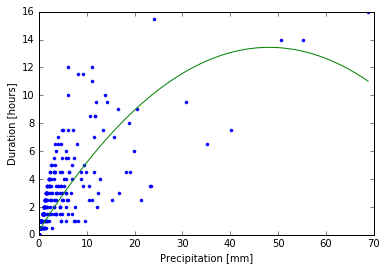

In [45]:
# plot P vs rain duration 
mod1 = sm.formula.ols('DRD ~ P + P2 + 1',data2).fit()
X = np.linspace(data2.P.min(),data2.P.max(),100)
y = (X*mod1.params['P'])+((X**2)*mod1.params['P2'])+mod1.params['Intercept']

plt.plot(data2.P,data2.DRD,'.')
plt.plot(X,y,'-')
plt.xlabel('Precipitation [mm]')
plt.ylabel('Duration [hours]')

In [44]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DRD   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     1107.
Date:                Thu, 26 May 2016   Prob (F-statistic):          1.25e-266
Time:                        11:43:27   Log-Likelihood:                -1732.0
No. Observations:                1129   AIC:                             3470.
Df Residuals:                    1126   BIC:                             3485.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2928      0.036      8.183      0.000         0.223     0.363
P              0.5459      0.015     36.705      0.000         0.517     0.575
P2            -0.0057      0.000    -17.006      0.000        -0.006    -0.005
==============================================================================
Omnibus:                      425.205   Durbin-Watson:                   1.456
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10587.684
Skew:                           1.162   Prob(JB):                         0.00
Kurtosis:                      17.821   Cond. No.                         218.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Process the Lower Site

In [46]:
files = glob.glob('./data/jemez_lower_ZOB/JemezBurnZOBLower_met_201*.csv')

In [47]:
data = pd.DataFrame(columns=header2)

for fl in files:
    tmp = pd.read_csv(fl,skiprows=2,names=header,na_values=-9999)
    tmp.index = pd.DatetimeIndex(tmp.DateTime)
    del tmp['DateTime']
    data = data.append(tmp)

In [48]:
# Add rain duration
data['Rain_Duration'] = 0.0
data.loc[np.isnan(data.P)==1,'P'] = 0.0
data.loc[data.P>0,'Rain_Duration'] = 0.5

In [49]:
data2 = pd.DataFrame()
data2['Tmin'] = data.resample('D',how=np.min).AT.as_matrix()
data2['Tmax'] = data.resample('D',how=np.max).AT.as_matrix()
data2['Tave'] = data.resample('D',how=np.nanmean).AT.as_matrix()
data2['P'] = data.resample('D', how=np.nansum).P.as_matrix()
data2['DRD'] = data.resample('D', how=np.nansum).Rain_Duration.as_matrix()
data2.index = data.resample('D').index

In [50]:
data2.head()

,Tmin,Tmax,Tave,P,DRD
2011-11-29,73.97043,74.13534,74.045396,0,0
2011-11-30,73.04162,73.99213,73.459555,0,0
2011-12-01,73.04838,73.65486,73.264915,0,0
2011-12-02,72.67686,73.62750,73.191883,0,0
2011-12-03,72.51282,73.20975,72.824356,0,0


In [51]:
data.to_pickle('./data/Jemez_lower.pcl')
data2.to_pickle('./data/Jemez_lower_daily.pcl')

In [52]:
data2['P2'] = data2['P']**2

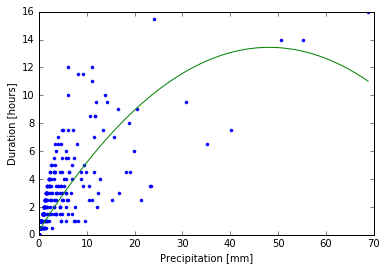

In [53]:
# plot P vs rain duration 
mod1 = sm.formula.ols('DRD ~ P + P2 + 1',data2).fit()
X = np.linspace(data2.P.min(),data2.P.max(),100)
y = (X*mod1.params['P'])+((X**2)*mod1.params['P2'])+mod1.params['Intercept']

plt.plot(data2.P,data2.DRD,'.')
plt.plot(X,y,'-')
plt.xlabel('Precipitation [mm]')
plt.ylabel('Duration [hours]')

In [54]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DRD   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     1107.
Date:                Thu, 26 May 2016   Prob (F-statistic):          1.25e-266
Time:                        11:48:24   Log-Likelihood:                -1732.0
No. Observations:                1129   AIC:                             3470.
Df Residuals:                    1126   BIC:                             3485.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2928      0.036      8.183      0.000         0.223     0.363
P              0.5459      0.015     36.705      0.000         0.517     0.575
P2            -0.0057      0.000    -17.006      0.000        -0.006    -0.005
==============================================================================
Omnibus:                      425.205   Durbin-Watson:                   1.456
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10587.684
Skew:                           1.162   Prob(JB):                         0.00
Kurtosis:                      17.821   Cond. No.                         218.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
mod1.save('./data/rain_duration_model.mod')

In [25]:
def compute_doy(index):
    dat = pd.datetime.strptime(str(index),'%Y-%m-%d %H:%M:%S')
    doy = float(dat.strftime('%j')) # get the day of year
    
    H = float(dat.strftime('%H')) # grab the hour
    M = int(dat.strftime('%M')) # grab the minutes
    H += M/60. # add the decimal minutes
    
    doy += H/24. # add the decimal hours onto the DOY
    
    return doy

In [36]:
def compute_hour(index):
    
    dat = pd.datetime.strptime(str(index),'%Y-%m-%d %H:%M:%S')
    
    H = float(dat.strftime('%H')) # grab the hour
    M = int(dat.strftime('%M')) # grab the minutes
    H += M/60. # add the decimal minutes
    
    return H 

In [26]:
data['decimal_doy'] = data.index.map(compute_doy)

In [37]:
data['hour'] = data.index.map(compute_hour)

In [38]:
data2 = data.groupby(by='hour').mean()

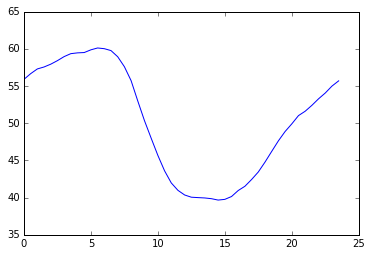

In [39]:
plt.plot(data2.index,data2.RH)

In [43]:
data2

,BatteryVoltage,AT,RH,WindSpeed,WindDirection,WindSTD,NetRadiation,P,Rain_Duration,decimal_doy
hour,,,,,,,,,,
0.0,13.152510,3.604091,55.891344,1.214325,162.471488,29.134289,-51.323524,0.012042,0.004829,189.238806
0.5,13.259840,3.427189,56.656645,1.210721,160.485386,29.429620,-51.197447,0.025644,0.006585,189.259639
1.0,13.245918,3.261117,57.292885,1.184176,163.679318,29.602685,-50.851917,0.016056,0.003951,189.280473
1.5,13.233059,3.105336,57.556624,1.181231,154.912350,28.939735,-50.910130,0.011819,0.005707,189.301306
2.0,13.220918,2.983689,57.932455,1.170749,155.499330,28.905387,-50.338260,0.030330,0.005268,189.322139
2.5,13.208923,2.859836,58.407678,1.144816,153.269454,29.663723,-50.138420,0.020520,0.006585,189.342973
3.0,13.197553,2.735359,58.951490,1.109811,155.964062,29.816274,-49.853260,0.003791,0.004390,189.363806
3.5,13.185678,2.590857,59.347343,1.103975,153.586973,28.793258,-49.908049,0.003568,0.003512,189.384639
4.0,13.174322,2.477818,59.453086,1.086051,153.230359,29.828404,-49.923935,0.007805,0.004390,189.405473


In [46]:
data2.AT.mean()

5.659319846049478

In [47]:
data2.AT.min()

2.1761832563881405

In [48]:
data2.AT.max()

9.8110939332713265